In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(lime); str(lime)

'data.frame':	385 obs. of  4 variables:
 $ Foliage: num  0.1 0.2 0.4 0.6 0.6 0.8 1 1.4 1.7 3.5 ...
 $ DBH    : num  4 6 8 9.6 11.3 13.7 15.4 17.8 18 22 ...
 $ Age    : int  38 38 46 44 60 56 72 74 68 79 ...
 $ Origin : Factor w/ 3 levels "Coppice","Natural",..: 2 2 2 2 2 2 2 2 2 2 ...


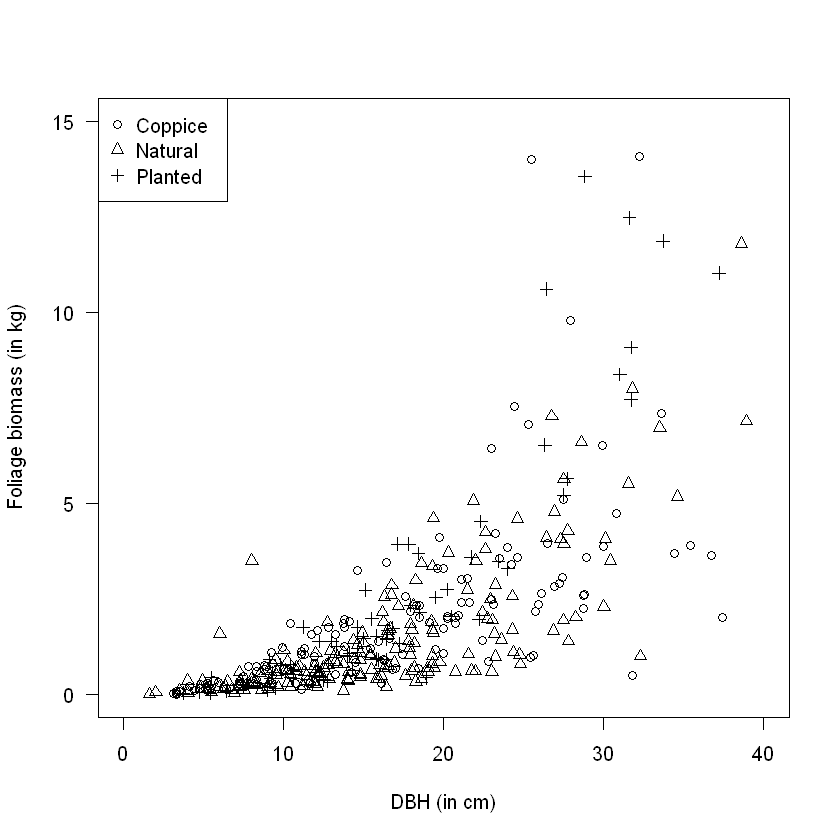

In [4]:
plot(Foliage ~ DBH, type="n", las=1,
xlab="DBH (in cm)", ylab="Foliage biomass (in kg)",
ylim = c(0, 15), xlim=c(0, 40), data=lime)
points(Foliage ~ DBH, data=subset(lime, Origin=="Coppice"),
pch=1)
points(Foliage ~ DBH, data=subset(lime, Origin=="Natural"),
pch=2)
points(Foliage ~ DBH, data=subset(lime, Origin=="Planted"),
pch=3)
legend("topleft", pch=c(1, 2, 3),
legend=c("Coppice", "Natural","Planted"))


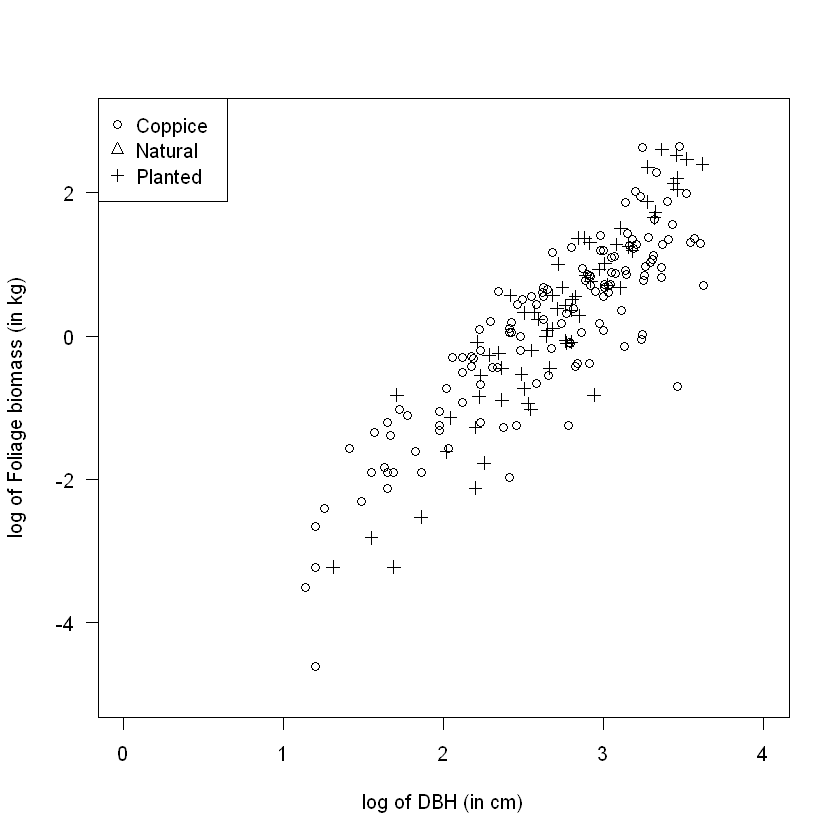

In [6]:

plot( log(Foliage) ~ log(DBH), type="n", las=1,
xlab="log of DBH (in cm)", ylab="log of Foliage biomass (in kg)",
ylim = c(-5, 3), xlim=c(0, 4), data=lime)
points( log(Foliage) ~ log(DBH), data=subset(lime, Origin=="Coppice"),
pch=1)
points( log(Foliage) ~ log(DBH), data=subset(lime, Origin=="Coppice"),
pch=1)
points( log(Foliage) ~ log(DBH), data=subset(lime, Origin=="Planted"),
pch=3)
legend("topleft", pch=c(1, 2, 3),
legend=c("Coppice", "Natural","Planted"))

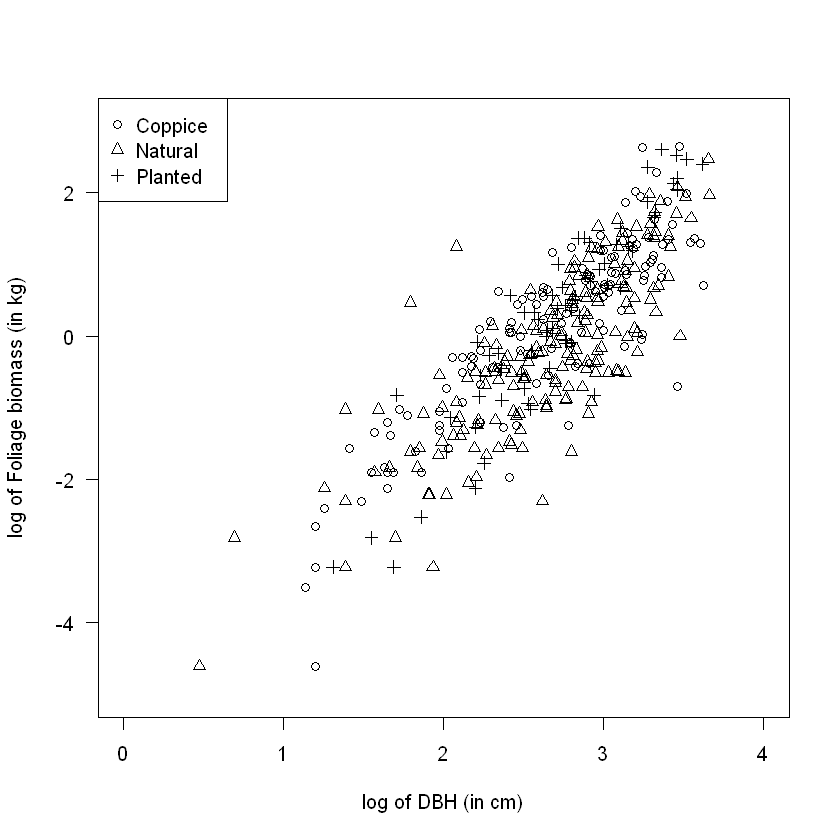

In [7]:
plot( log(Foliage) ~ log(DBH), type="n", las=1,
xlab="log of DBH (in cm)", ylab="log of Foliage biomass (in kg)",
ylim = c(-5, 3), xlim=c(0, 4), data=lime)
points( log(Foliage) ~ log(DBH), data=subset(lime, Origin=="Coppice"),
pch=1)
points( log(Foliage) ~ log(DBH), data=subset(lime, Origin=="Natural"),
pch=2)
points( log(Foliage) ~ log(DBH), data=subset(lime, Origin=="Planted"),
pch=3)
legend("topleft", pch=c(1, 2, 3),
legend=c("Coppice", "Natural","Planted"))

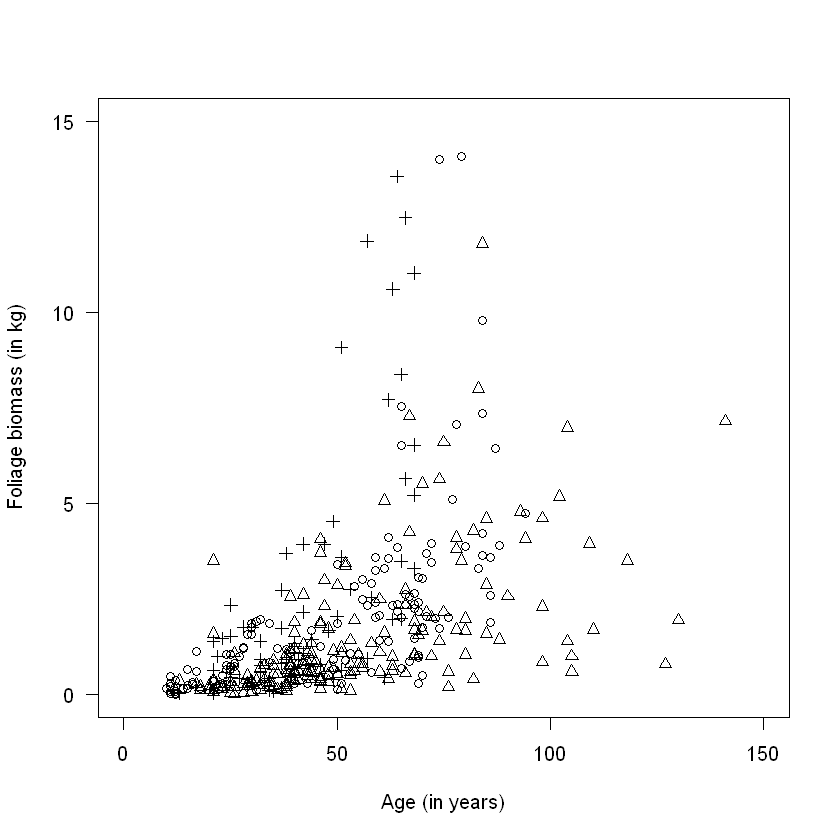

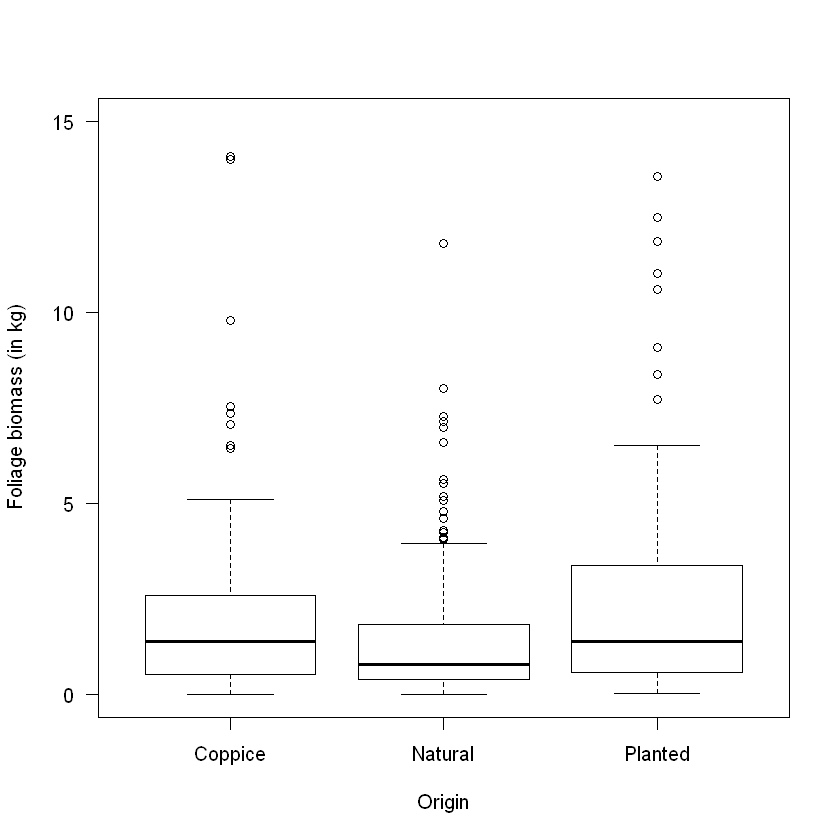

In [8]:
plot(Foliage ~ Age, type="n", las=1,
xlab="Age (in years)", ylab="Foliage biomass (in kg)",
ylim = c(0, 15), xlim=c(0, 150), data=lime)
points(Foliage ~ Age, data=subset(lime, Origin=="Coppice"), pch=1)
points(Foliage ~ Age, data=subset(lime, Origin=="Natural"), pch=2)
points(Foliage ~ Age, data=subset(lime, Origin=="Planted"), pch=3)
#
# Plot Foliage against Origin
plot( Foliage ~ Origin, data=lime, ylim=c(0, 15),
las=1, ylab="Foliage biomass (in kg)")

(Intercept)  c(log(mn)) 
  -0.165002    1.706453

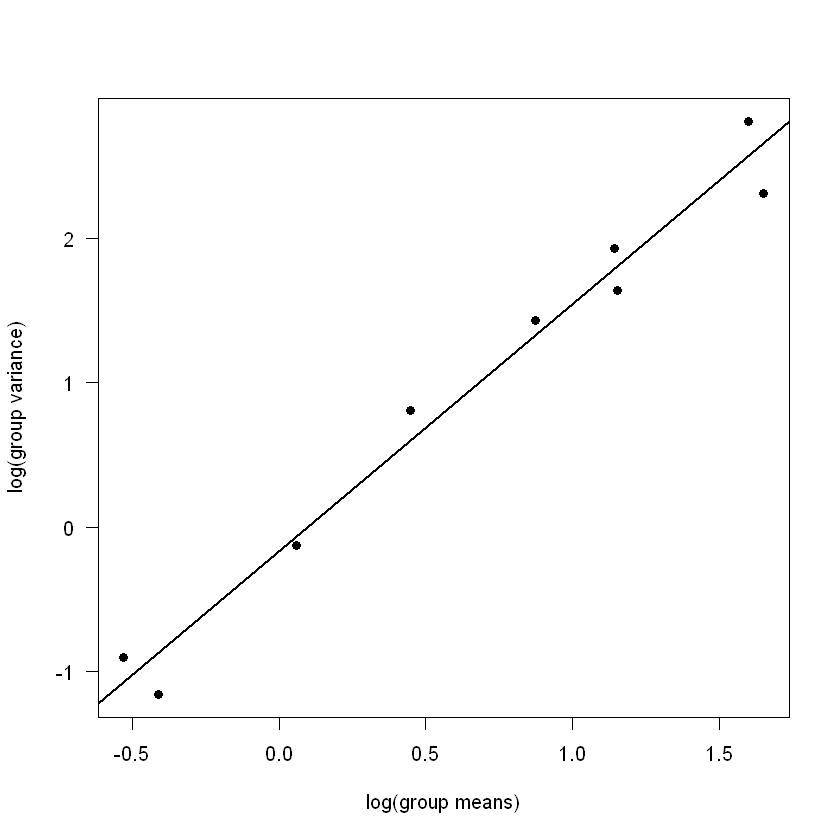

In [9]:
lime$AgeGrp <- cut(lime$Age, breaks=4 )
vr <- with( lime, tapply(Foliage, list(AgeGrp, Origin), "var" ) )
mn <- with( lime, tapply(Foliage, list(AgeGrp, Origin), "mean" ) )
plot( log(vr) ~ log(mn), las=1, pch=19,
xlab="log(group means)", ylab="log(group variance)")
mf.lm <- lm( c(log(vr)) ~ c(log(mn)) )
coef( mf.lm )
abline( coef( mf.lm ), lwd=2)

In [10]:
lime.log <- glm( Foliage ~ Origin * log(DBH), family=Gamma(link="log"),
data=lime)

In [14]:
coef(summary(lime.log))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-4.6289255,0.2756440,-16.793131,1.043735e-47
OriginNatural,0.3245216,0.3882056,0.835953,4.037080e-01
OriginPlanted,-1.5284910,0.5726768,-2.669029,7.934033e-03
log(DBH),1.8431878,0.1015579,18.149137,2.007634e-53
OriginNatural:log(DBH),-0.2040329,0.1433129,-1.423688,1.553596e-01
OriginPlanted:log(DBH),0.5767826,0.2093256,2.755433,6.144372e-03


In [15]:
anova(lime.log, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,384,508.4806,NA,NA
Origin,2,19.894208,382,488.5864,18.27244,2.654798e-08
log(DBH),1,328.006627,381,160.5798,602.53532,2.532432e-80
Origin:log(DBH),2,7.890304,379,152.6895,7.24709,8.153050e-04


In [13]:
gof.dev <- deviance(lime.log)
gof.pearson <- sum(lime.log$weights * lime.log$residuals^2)

pchisq(gof.dev, df=df.residual(lime.log), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(lime.log), lower.tail = FALSE)

gof.dev / df.residual(lime.log)
gof.pearson / df.residual(lime.log)

[1] 1

[1] 1

[1] 0.4028747

[1] 0.5443774

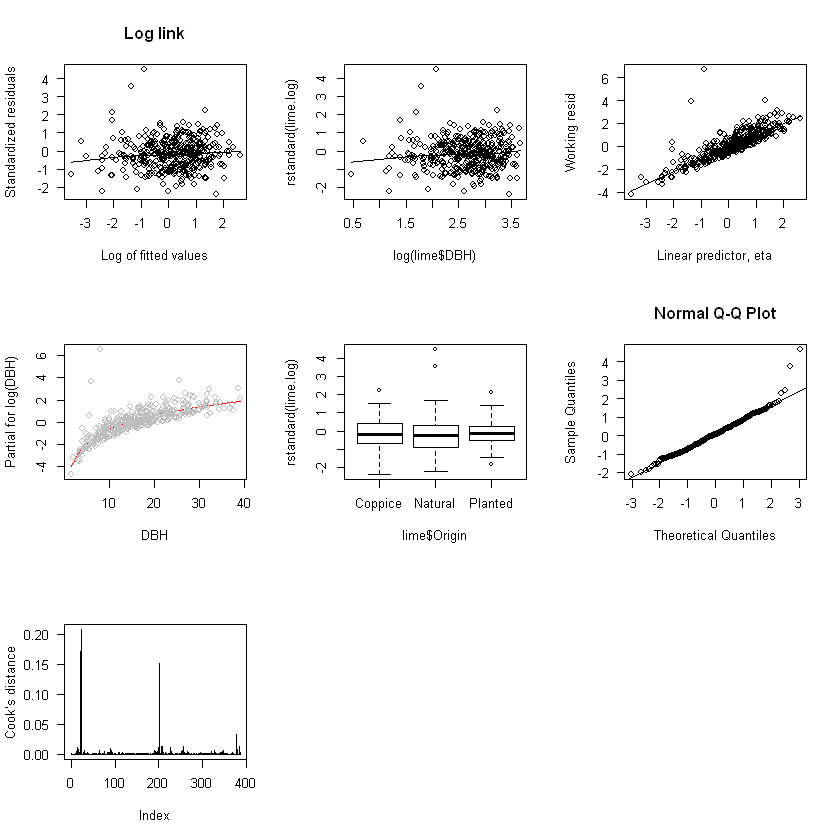

In [23]:
par(mfrow=c(3, 3))
scatter.smooth(rstandard(lime.log) ~ log(fitted(lime.log)), main="Log link", las=1,
xlab="Log of fitted values", ylab="Standardized residuals")
## CHECK LINEAR PREDICTOR
scatter.smooth(rstandard(lime.log) ~ log(lime$DBH))
eta.log <- lime.log$linear.predictor
scatter.smooth(resid(lime.log, type="working") + eta.log ~ eta.log, las=1,
ylab="Working resid", xlab="Linear predictor, eta")
termplot(lime.log, partial.resid = TRUE, terms="log(DBH)")
plot(rstandard(lime.log) ~ lime$Origin)
## QQ PLOT OF RESIDUALS
qqnorm( qr1 <- qresid(lime.log), las=1 ); qqline( qr1 )
## COOK'S DISTANCE
plot( cooks.distance(lime.log), ylab="Cook's distance", las=1, type="h")

In [22]:
colSums(influence.measures(lime.log)$is.inf)
rowSums(influence.measures(lime.log)$is.inf)

dfb.1_ dfb.OrgN dfb.OrgP dfb.l(DB dfb.ON:( dfb.OP:(    dffit    cov.r 
       0        0        0        0        0        0        7       29 
  cook.d      hat 
       0       18

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   2   2   3   0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  0   0   0   0   0   0   0   0   0   2   0   0   2   0   0   0   0   0   0   0 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
  1   2   0   0   0   0   0   1   3   2   0   0   0   0   1   2   2   0   2   1 
221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 
  1   0   0   0   2   0   0   0   0   0   0   2   2   0   0   0   0   0   0   0 
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 
  0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   2   2   0   0 
261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 
  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1 
321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 
  0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0 
381 382 383 384 385 
  0   0   0   0   0

In [ ]:
boxplot( Perm ~ Day, data=perm, las=1, ylim=c(0, 200),
xlab="Day", ylab="Permeability (in s)")

In [24]:
lime.iG <- glm( Foliage ~ Origin * log(DBH),
family=inverse.gaussian(link="log"), data=lime)

In [25]:
phi.iG.mle <- deviance(lime.iG)/length(lime$Foliage) # ML estimate
phi.iG.md <- deviance(lime.iG)/df.residual(lime.iG) # Mean dev
phi.iG.pearson <- summary( lime.iG )$dispersion # Pearson
c( "MLE"=phi.iG.mle, "Mean dev."=phi.iG.md, "Pearson"=phi.iG.pearson)

MLE Mean dev.   Pearson 
 1.056659  1.073387  1.255992

In [26]:
c( "Gamma:"=AIC(lime.log), "inv. Gauss.:"=AIC(lime.iG) )

Gamma: inv. Gauss.: 
    750.3267    1089.5297

In [27]:
data(perm); str(perm)

'data.frame':	81 obs. of  3 variables:
 $ Day : int  1 1 1 1 1 1 1 1 1 2 ...
 $ Mach: Factor w/ 3 levels "A","B","C": 1 1 1 2 2 2 3 3 3 1 ...
 $ Perm: num  25.4 22.2 41.5 20.2 42.5 ...


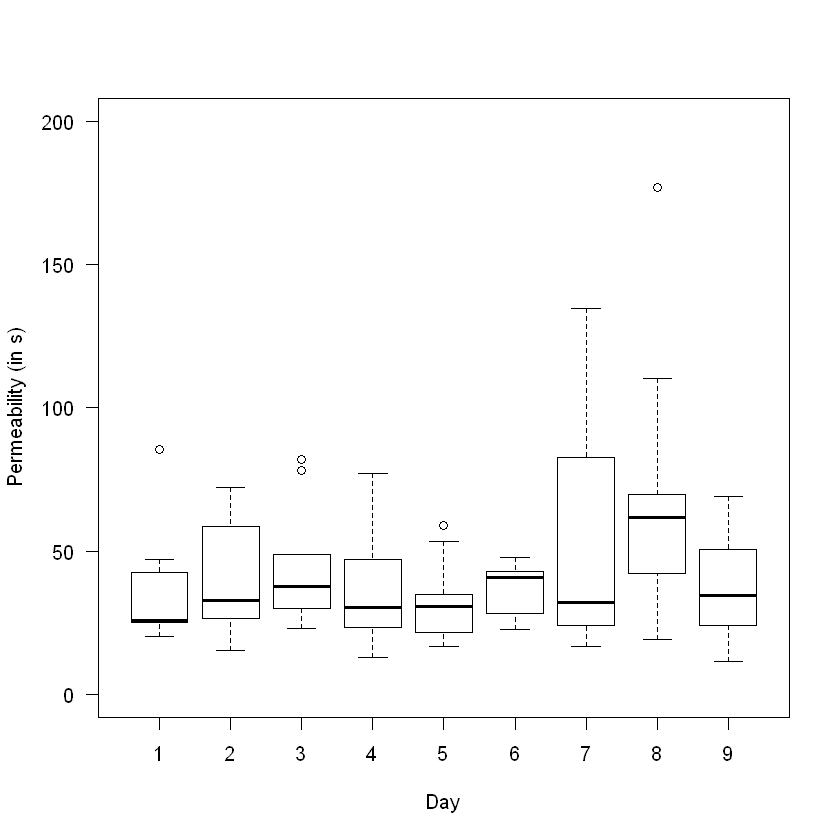

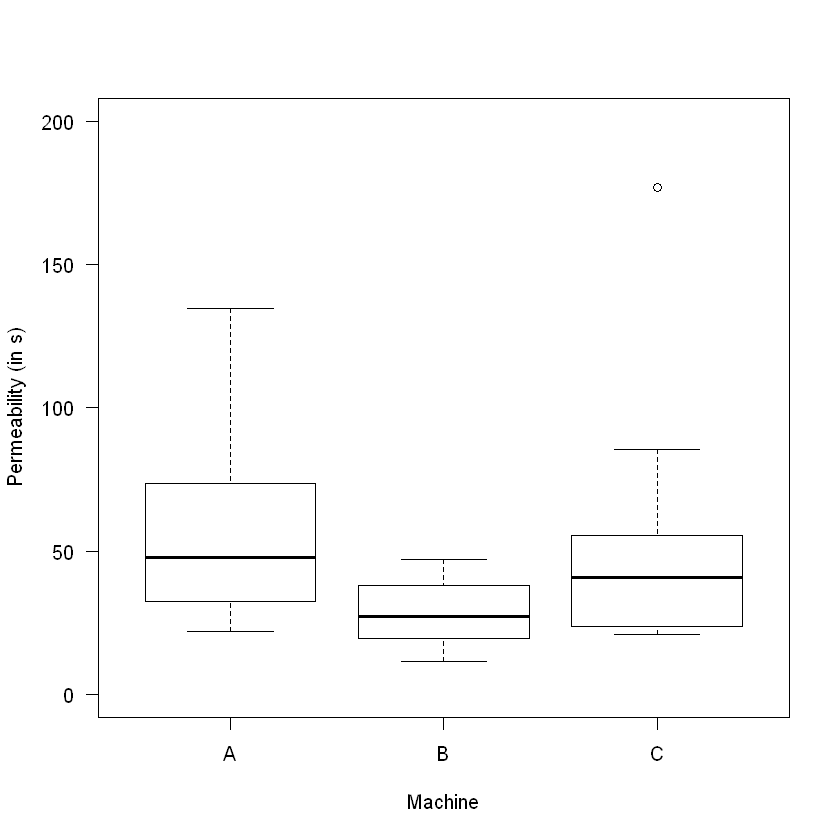

In [29]:
boxplot( Perm ~ Day, data=perm, las=1, ylim=c(0, 200),
xlab="Day", ylab="Permeability (in s)")
boxplot( Perm ~ Mach, data=perm, las=1, ylim=c(0, 200),
xlab="Machine", ylab="Permeability (in s)")

In [30]:
perm.log <- glm( Perm ~ Mach * Day, data=perm,
family=inverse.gaussian(link="log") )

In [31]:
coef(summary(perm.log))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.56906403,0.22332818,15.9812523,7.379128e-26
MachB,-0.20946368,0.28610831,-0.7321132,4.663811e-01
MachC,0.09831079,0.31203801,0.3150603,7.535908e-01
Day,0.08365676,0.04358064,1.9195854,5.871395e-02
MachB:Day,-0.08315756,0.05394727,-1.5414599,1.274138e-01
MachC:Day,-0.05263076,0.05918313,-0.8892865,3.766927e-01


In [32]:
anova(perm.log, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,80,0.6174583,NA,NA
Mach,2,0.14044806,78,0.4770103,11.132347,5.840854e-05
Day,1,0.01092298,77,0.4660873,1.731578,1.922175e-01
Mach:Day,2,0.01293085,75,0.4531564,1.024939,3.637886e-01


In [34]:
gof.dev <- deviance(perm.log)
gof.pearson <- sum(perm.log$weights * perm.log$residuals^2)

pchisq(gof.dev, df=df.residual(perm.log), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(perm.log), FALSE)

gof.dev / df.residual(perm.log)
gof.pearson / df.residual(perm.log)

[1] 1

[1] 3.126995e-68

[1] 0.006042086

[1] 0.006308106


	Shapiro-Wilk normality test

data:  qr1
W = 0.98012, p-value = 0.2407


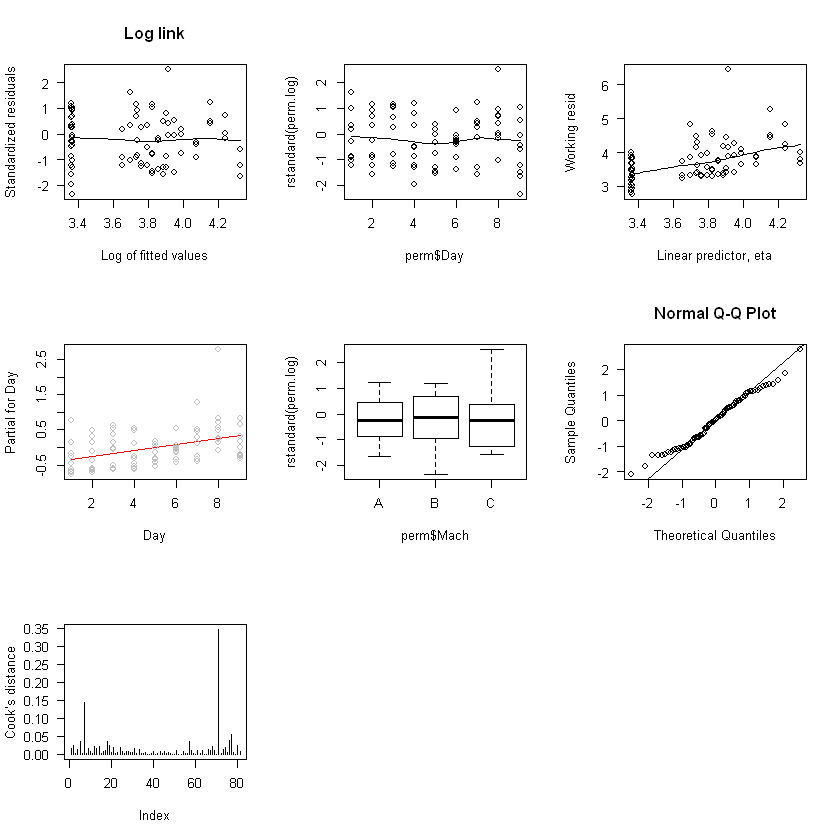

In [42]:
par(mfrow=c(3, 3))
scatter.smooth(rstandard(perm.log) ~ log(fitted(perm.log)), main="Log link", las=1,
xlab="Log of fitted values", ylab="Standardized residuals")
## CHECK LINEAR PREDICTOR
scatter.smooth(rstandard(perm.log) ~ perm$Day)
eta.log <- perm.log$linear.predictor
scatter.smooth(resid(perm.log, type="working") + eta.log ~ eta.log, las=1,
ylab="Working resid", xlab="Linear predictor, eta")
termplot(perm.log, partial.resid = TRUE, terms="Day")
plot(rstandard(perm.log) ~ perm$Mach)
### QQ PLOT OF RESIDUALS
qqnorm( qr1 <- qresid(perm.log), las=1 ); qqline( qr1 )
### COOK'S DISTANCE
plot( cooks.distance(perm.log), ylab="Cook's distance", las=1, type="h")

shapiro.test(qr1)

In [43]:
colSums(influence.measures(perm.log)$is.inf)
rowSums(influence.measures(perm.log)$is.inf)

dfb.1_ dfb.MchB dfb.MchC  dfb.Day dfb.MB:D dfb.MC:D    dffit    cov.r 
       0        0        0        0        0        0        1        2 
  cook.d      hat 
       0        0

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0 
79 80 81 
 0  0  0

In [44]:
data(yieldden); yieldden$Var <- factor(yieldden$Var)

In [45]:
yieldden$YD <- with(yieldden, Yield * Dens )

In [46]:
yieldden

Yield,Dens,Var,YD
105.6,3.07,1,324.192
89.4,3.31,1,295.914
71.0,5.97,1,423.870
60.3,6.99,1,421.497
47.6,8.67,1,412.692
37.7,13.39,1,504.803
30.3,17.86,1,541.158
24.2,21.57,1,521.994
20.8,28.77,1,598.416
18.5,31.08,1,574.980


In [47]:
yd.glm.int <- glm( YD ~ (Dens + I(1/Dens)) * Var,
family=Gamma(link=inverse), data=yieldden )

In [48]:
round( anova( yd.glm.int, test="F"), 2)

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,29,1.45,NA,NA
Dens,1,1.00,28,0.45,191.67,0.00
I(1/Dens),1,0.27,27,0.18,51.28,0.00
Var,2,0.06,25,0.12,5.48,0.01
Dens:Var,2,0.01,23,0.12,0.57,0.57
I(1/Dens):Var,2,0.01,21,0.11,0.53,0.59


In [49]:
yd.glm <- update( yd.glm.int, . ~ Dens + I(1/Dens) + Var )

In [50]:
round( anova(yd.glm, test="F"), 2)

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,29,1.45,NA,NA
Dens,1,1.00,28,0.45,209.56,0.00
I(1/Dens),1,0.27,27,0.18,56.07,0.00
Var,2,0.06,25,0.12,5.99,0.01


In [51]:
printCoefmat( coef(summary(yd.glm)), 5)

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  1.9687e-03  1.3934e-04 14.1292 2.009e-13 ***
Dens        -1.2609e-05  5.1637e-06 -2.4419  0.022026 *  
I(1/Dens)    3.5744e-03  4.9364e-04  7.2409 1.376e-07 ***
Var2         1.0015e-04  7.1727e-05  1.3963  0.174914    
Var3         2.4503e-04  7.1187e-05  3.4420  0.002041 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [55]:
gof.dev <- deviance(yd.glm)
gof.pearson <- sum(yd.glm$weights * yd.glm$residuals^2)

pchisq(gof.dev, df=df.residual(yd.glm), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(yd.glm), lower.tail=FALSE)

gof.dev / df.residual(yd.glm)
gof.pearson / df.residual(yd.glm)

[1] 1

[1] 1

[1] 0.004866494

[1] 0.004789151


	Shapiro-Wilk normality test

data:  qr1
W = 0.94739, p-value = 0.1439


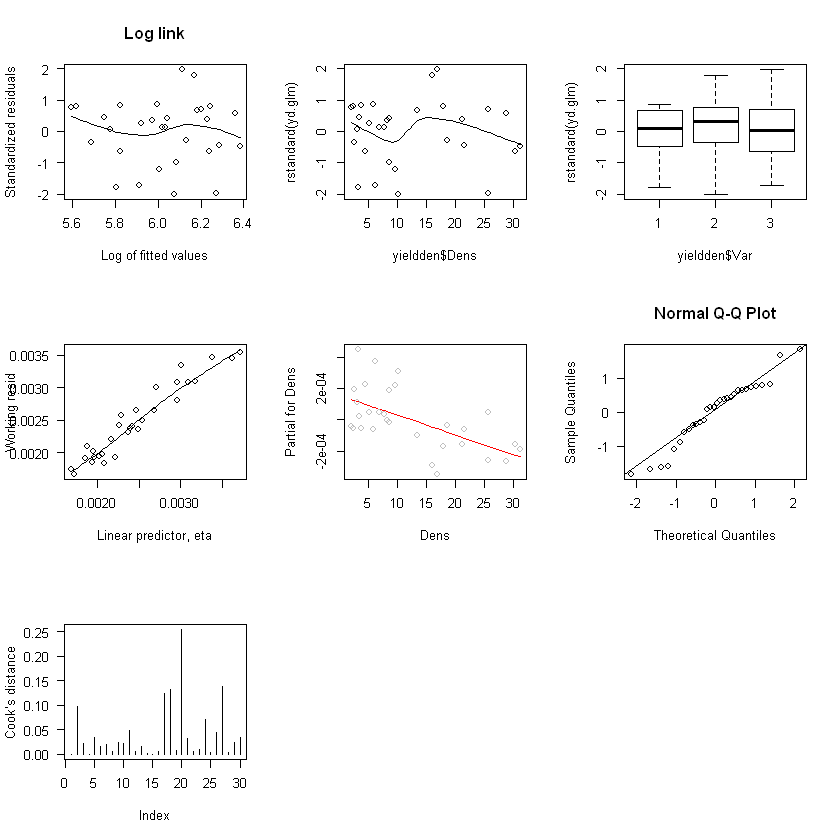

In [62]:
par(mfrow=c(3, 3))
scatter.smooth(rstandard(yd.glm) ~ log(fitted(yd.glm)), main="Log link", las=1,
xlab="Log of fitted values", ylab="Standardized residuals")
## CHECK LINEAR PREDICTOR
scatter.smooth(rstandard(yd.glm) ~ yieldden$Dens)
plot(rstandard(yd.glm) ~ yieldden$Var)
eta.log <- yd.glm$linear.predictor
scatter.smooth(resid(yd.glm, type="working") + eta.log ~ eta.log, las=1,
ylab="Working resid", xlab="Linear predictor, eta")
termplot(yd.glm, partial.resid = TRUE, terms="Dens")
#plot(rstandard(yd.glm) ~ yieldden$Var)
### QQ PLOT OF RESIDUALS
qqnorm( qr1 <- qresid(yd.glm), las=1 ); qqline( qr1 )
### COOK'S DISTANCE
plot( cooks.distance(yd.glm), ylab="Cook's distance", las=1, type="h")

shapiro.test(qr1)

In [56]:
colSums(influence.measures(yd.glm)$is.inf)
rowSums(influence.measures(yd.glm)$is.inf)

dfb.1_ dfb.Dens dfb.I(1/ dfb.Var2 dfb.Var3    dffit    cov.r   cook.d 
       0        0        0        0        0        0        2        0 
     hat 
       0

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
27 28 29 30 
 0  0  0  1